# Step 0: Import necessary libraries

In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Custom modules
import db.db as db
import utils.utils as utils

## Jupyter notebook specific settings


In [39]:
# Jupyter notebook specific settings
%matplotlib inline
sns.set(style='whitegrid')

# Step 1: Connect to the database and load data


In [22]:
def get_data_from_database(file_path: Path) -> None:
    """Create connection to database and load data.

    Args:
        file_path (Path): Data file path.
    """
    connection = db.connect_to_database()
    data = db.query_data(connection=connection, type="sql")
    if type(data) == list:
        # sql return value converted to csv
        utils.convert_to_csv(data=data, output_path=file_path)
    elif type(data) == pd.DataFrame:
        data.to_csv(file_path, index=False)
    else:
        print("Data invalid or empty.")
        raise


# File paths and data loading
directory = Path("data")
file_path = directory / "data.csv"
utils.handle_paths(directory=directory, file_path=file_path)
data_file_is_empty = utils.check_data_file_empty(file_path=file_path)

if data_file_is_empty:
    get_data_from_database(file_path=file_path)

data = utils.load_data_csv(path=file_path)

# Step 2: Basic data preprocessing and statistics


In [23]:
# Handling missing values before statistics
data["start_position"] = pd.to_numeric(data["start_position"], errors="coerce")
data["end_position"] = pd.to_numeric(data["end_position"], errors="coerce")
data["gene_expression"] = pd.to_numeric(data["gene_expression"], errors="coerce")

# Fill or drop NaNs for meaningful statistics
data.fillna(
    {
        "start_position": data["start_position"].mean(),
        "end_position": data["end_position"].mean(),
        "gene_expression": data["gene_expression"].mean(),
        "chromosome": "Unknown",
        "strand": "+",
    },
    inplace=True,
)

# Statistics after handling NaNs
numeric_columns = ["start_position", "end_position", "gene_expression"]
stats_after_fill = data[numeric_columns].describe()

# Display statistics
print("\nStatistical values (after handling NaNs):")
print(stats_after_fill)

# Additional statistics
min_values = data[numeric_columns].min()
max_values = data[numeric_columns].max()
mean_values = data[numeric_columns].mean()
ranges = max_values - min_values

# umcomment for additional stats
# print("\nMinimum values:")
# print(min_values)
# print("\nMaximum values:")
# print(max_values)
# print("\nMean values:")
# print(mean_values)
print("\nRanges:")
print(ranges)


Statistical values (after handling NaNs):
       start_position   end_position  gene_expression
count       65.000000      65.000000        65.000000
mean     65046.153846   66046.153846         0.596462
std      37892.706574   37892.706574         0.222116
min       1000.000000    2000.000000         0.100000
25%      33000.000000   34000.000000         0.420000
50%      65000.000000   66000.000000         0.620000
75%      97000.000000   98000.000000         0.770000
max     130000.000000  131000.000000         1.050000

Ranges:
start_position     129000.00
end_position       129000.00
gene_expression         0.95
dtype: float64


# Step 4: Visualization


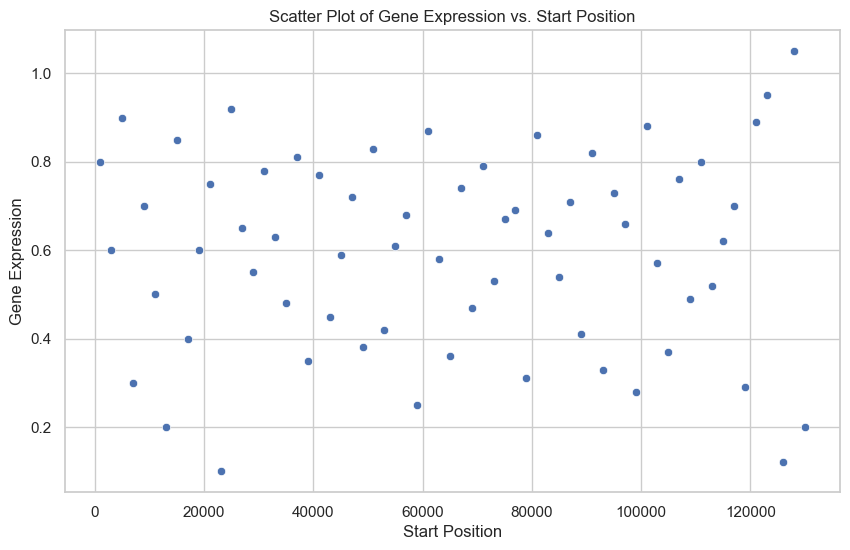

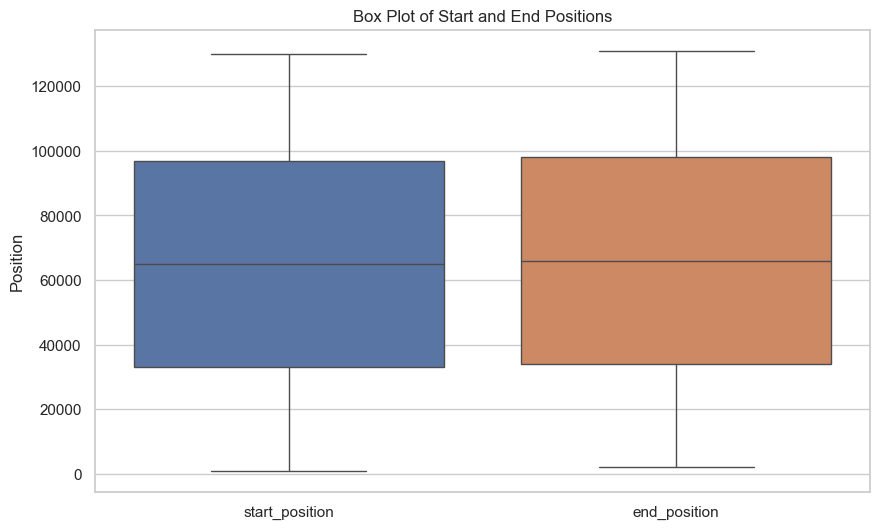

In [40]:
# Scatter plot for gene expression vs. start position
plt.figure(figsize=(10, 6))
sns.scatterplot(x="start_position", y="gene_expression", data=data)
plt.title("Scatter Plot of Gene Expression vs. Start Position")
plt.xlabel("Start Position")
plt.ylabel("Gene Expression")
plt.show()

# Box plot for start_position and end_position
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["start_position", "end_position"]])
plt.title("Box Plot of Start and End Positions")
plt.ylabel("Position")
plt.show()